In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['agg.path.chunksize'] = 10000

plt.style.use('dark_background')
plt.rcParams.update({"figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})
%matplotlib inline

In [101]:
degree = 180/np.pi

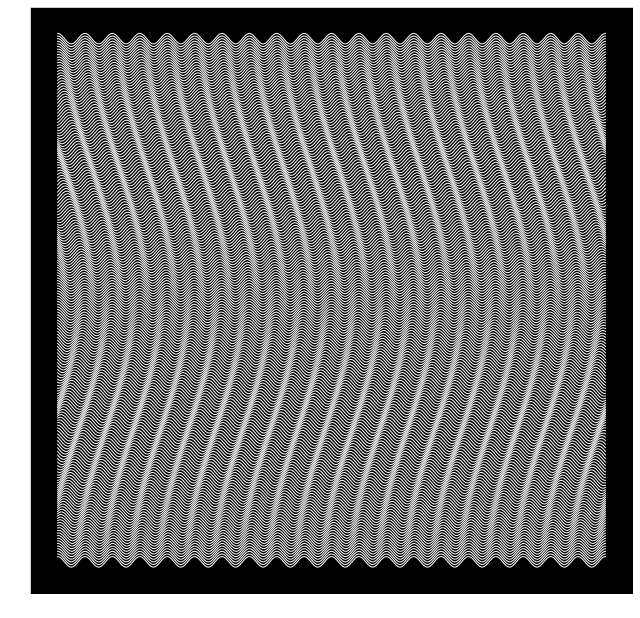

In [40]:
amplitude = 0.01
offset_delta = 0.005
y_max = 1


offsets = np.arange(0,y_max,offset_delta)

offset_function = lambda y: 2*np.pi*np.cos(2*np.pi*y/y_max)

fig = plt.figure()
fig.set_size_inches((10.80,10.80))
fig.patch.set_alpha(1)
ax = plt.gca()

Thetas = np.linspace(0,20*2*np.pi,500)

for count, offset in enumerate(offsets):
    
    ax.plot(Thetas,amplitude*np.cos(Thetas+offset_function(offset))+offset,'w',lw=1)
plt.show()

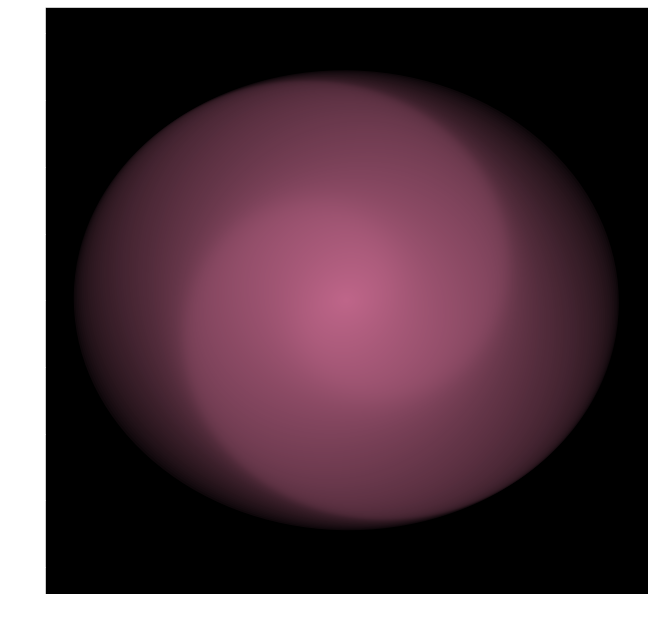

In [87]:
a_max = 1
eccentricity = 0.5
n_ellipses = 200
n_colors = 10

a_array = np.linspace(a_max,0,n_ellipses, endpoint=False)
b_array = np.sqrt(1-eccentricity*eccentricity)*a_array

fig = plt.figure()
fig.set_size_inches((10.80,10.80))
fig.patch.set_alpha(1)
ax = plt.gca()

ax.set_xlim([-1.1*a_max,1.1*a_max])
ax.set_ylim([-1.1*a_max,1.1*a_max])

color_bins = np.linspace(1,0,n_colors+1)
color_array = np.array([mpl.colors.hsv_to_rgb([336/360,0.47,0.75*v]) for v in color_bins])

for semi_major, semi_minor in zip(a_array,b_array):
    
    a_fraction = semi_major/a_max
    
    angle = 360*a_fraction
    color =  mpl.colors.hsv_to_rgb([336/360,0.47,0.75*np.sqrt(1-a_fraction)])
    ellipse = mpl.patches.Ellipse([0,0],2*semi_major, 2*semi_minor,ec='k',fc=color,angle=angle,lw=0)
    ax.add_patch(ellipse)

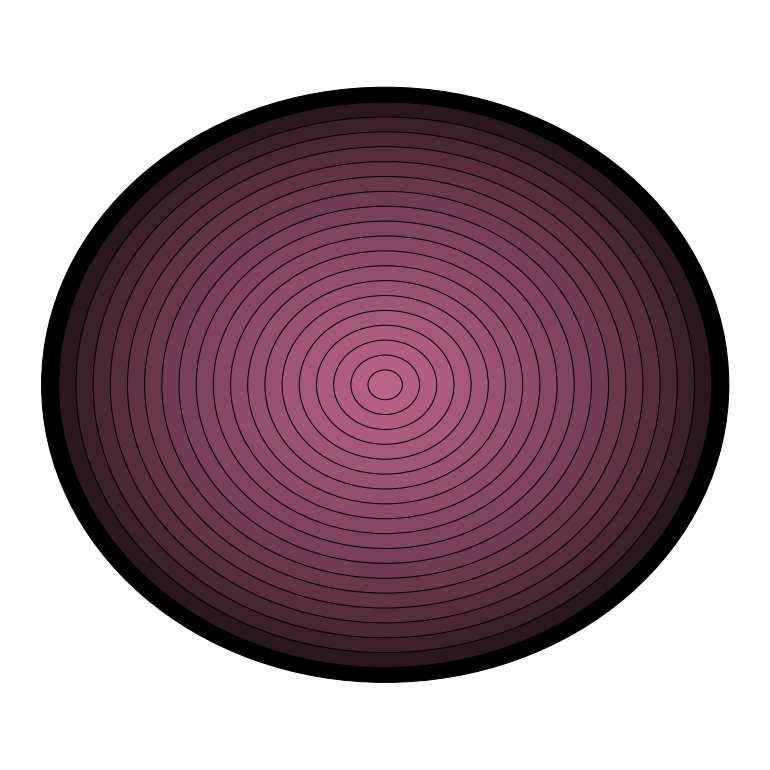

In [121]:
a_max = 1
eccentricity = 0.5
n_ellipses = 20
n_colors = 10

circular_velocity = lambda r: r*r #lambda r: np.sqrt((1/r)*np.log(1+r)-(1/(1+r)))

t_end = 10*(2*np.pi)/circular_velocity(a_max)
simtime_to_realtime = 0.5
n_frames = int(60*t_end*simtime_to_realtime)

a_array = np.linspace(a_max,0,n_ellipses, endpoint=False)
b_array = np.sqrt(1-eccentricity*eccentricity)*a_array

fig = plt.figure()
fig.set_size_inches((10.80,10.80))
fig.patch.set_alpha(1)
ax = plt.gca()


color_bins = np.linspace(1,0,n_colors+1)
color_array = np.array([mpl.colors.hsv_to_rgb([336/360,0.47,0.75*v]) for v in color_bins])

Ts = np.linspace(0,t_end,n_frames)

angular_freqs = circular_velocity(a_array/a_max)/a_array

for frame, t in enumerate(Ts):

    ax.cla()
    ax.set_xlim([-1.1*a_max,1.1*a_max])
    ax.set_ylim([-1.1*a_max,1.1*a_max])

    
    for semi_major, semi_minor, ang_freq in zip(a_array,b_array,angular_freqs):

        a_fraction = semi_major/a_max
        
        angle = ang_freq*degree*t
        color =  mpl.colors.hsv_to_rgb([336/360,0.47,0.75*np.sqrt(1-a_fraction)])
        ellipse = mpl.patches.Ellipse([0,0],2*semi_major, 2*semi_minor,ec='k',fc=color,angle=angle,lw=1)
        ax.add_patch(ellipse)
    
    ax.axis('off')
    fig.tight_layout()
    fig.savefig("animation/ellipses%04d.png"%frame,dpi=100)
    print('Frame',frame+1,'of',n_frames,end='\r')

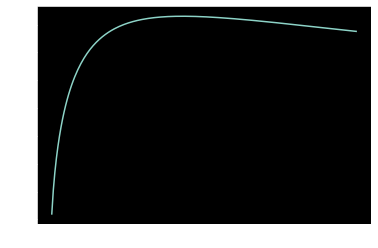

In [108]:
Rs = np.linspace(5,0,200,endpoint=False)
plt.plot(Rs,circular_velocity(Rs))
plt.show()